In [49]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file and read the specified range
file_path = 'Vendor_List.xlsx'
sheet_name = '0405 48h distribution'  # Adjust if the sheet name is different
df = pd.read_excel(file_path, sheet_name=sheet_name, usecols="A:CA", nrows=17)

# Renaming the columns to match the original dataset
df.columns = df.iloc[0]
df = df.drop(0).reset_index(drop=True)

display(df)

,Positives,ALYac,APEX,AVG,Acronis,AhnLab_V3,Alibaba,Antiy_AVL,Arcabit,Avast,...,ViRobot,VirIT,Webroot,Xcitium,Yandex,Zillya,ZoneAlarm,Zoner,alibabacloud,tehtris
0,0,37,25170,1254,1,1169,183,5745,25,1254,...,45,3070,0,697,1421,5565,1274,168,1096,1835
1,5,487,7246,4099,9,1953,855,6161,614,4099,...,63,1734,0,891,889,3167,2264,240,1210,528
2,10,3371,6859,8615,2,4727,2261,12626,3970,8615,...,1774,2162,0,1631,5370,4342,3966,307,2886,560
3,15,4317,12272,12786,28,9570,7284,20440,5036,12786,...,1387,5247,0,2491,5651,4213,5536,510,3819,1319
4,20,9967,19322,20302,81,19838,11445,34046,11670,20302,...,4346,5112,0,3917,4031,7371,10975,834,7053,2451
5,25,20147,23239,33703,126,30816,11894,35285,27753,33703,...,10608,4469,0,4395,4330,9489,19912,1298,13390,3275
6,30,26072,11054,52985,359,43087,9334,17461,50631,52985,...,25557,3189,0,4610,3158,7220,34232,1263,13725,2706
7,35,13595,7004,14642,740,8494,7056,13259,14475,14642,...,3142,3273,0,4754,3510,5721,10549,1527,8508,2030
8,40,17800,7775,18249,1869,12882,11379,17424,18812,18249,...,3942,4665,0,6527,4744,8861,15384,1224,10328,1813
9,45,23081,11413,23458,2194,19231,16728,21718,24213,23458,...,4454,8383,0,7969,8113,12697,22122,1309,13157,1885


In [51]:
# Ensure all data is numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Function to compute pairwise Kolmogorov-Smirnov test
def ks_test(dataframe):
    vendors = dataframe.columns[1:]
    ks_results = pd.DataFrame(index=vendors, columns=vendors)
    for i in vendors:
        for j in vendors:
            ks_stat, ks_pvalue = ks_2samp(dataframe[i], dataframe[j])
            ks_results.loc[i, j] = ks_stat
    return ks_results

# Function to compute pairwise Pearson correlation
def pearson_corr(dataframe):
    vendors = dataframe.columns[1:]
    corr_results = pd.DataFrame(index=vendors, columns=vendors)
    for i in vendors:
        for j in vendors:
            corr_coeff, p_value = pearsonr(dataframe[i], dataframe[j])
            corr_results.loc[i, j] = corr_coeff
    return corr_results

# Compute the Kolmogorov-Smirnov test results
ks_results = ks_test(df)

# Compute the Pearson correlation coefficients
corr_results = pearson_corr(df)

# Display the results
print("Kolmogorov-Smirnov Test Results:")
print(ks_results)
print("\nPearson Correlation Coefficients:")
print(corr_results)


c:\Users\t-jiajunfu\Documents\GitHub\BuildSomeCoolThings\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\t-jiajunfu\AppData\Local\Temp\ipykernel_9324\2315967086.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coeff, p_value = pearsonr(dataframe[i], dataframe[j])


Kolmogorov-Smirnov Test Results:
0                ALYac      APEX       AVG   Acronis AhnLab_V3   Alibaba  \
0                                                                          
ALYac              0.0  0.266667       0.2       0.6       0.2  0.266667   
APEX          0.266667       0.0  0.266667       0.8       0.2       0.2   
AVG                0.2  0.266667       0.0  0.666667       0.2       0.4   
Acronis            0.6       0.8  0.666667       0.0       0.6       0.6   
AhnLab_V3          0.2       0.2       0.2       0.6       0.0  0.266667   
...                ...       ...       ...       ...       ...       ...   
Zillya        0.333333  0.333333  0.466667  0.733333  0.333333       0.2   
ZoneAlarm     0.133333  0.266667       0.2  0.666667  0.133333  0.266667   
Zoner         0.666667  0.866667  0.733333       0.4  0.733333  0.666667   
alibabacloud  0.333333  0.266667  0.466667       0.6  0.333333  0.133333   
tehtris       0.533333  0.733333       0.6  0.466667   

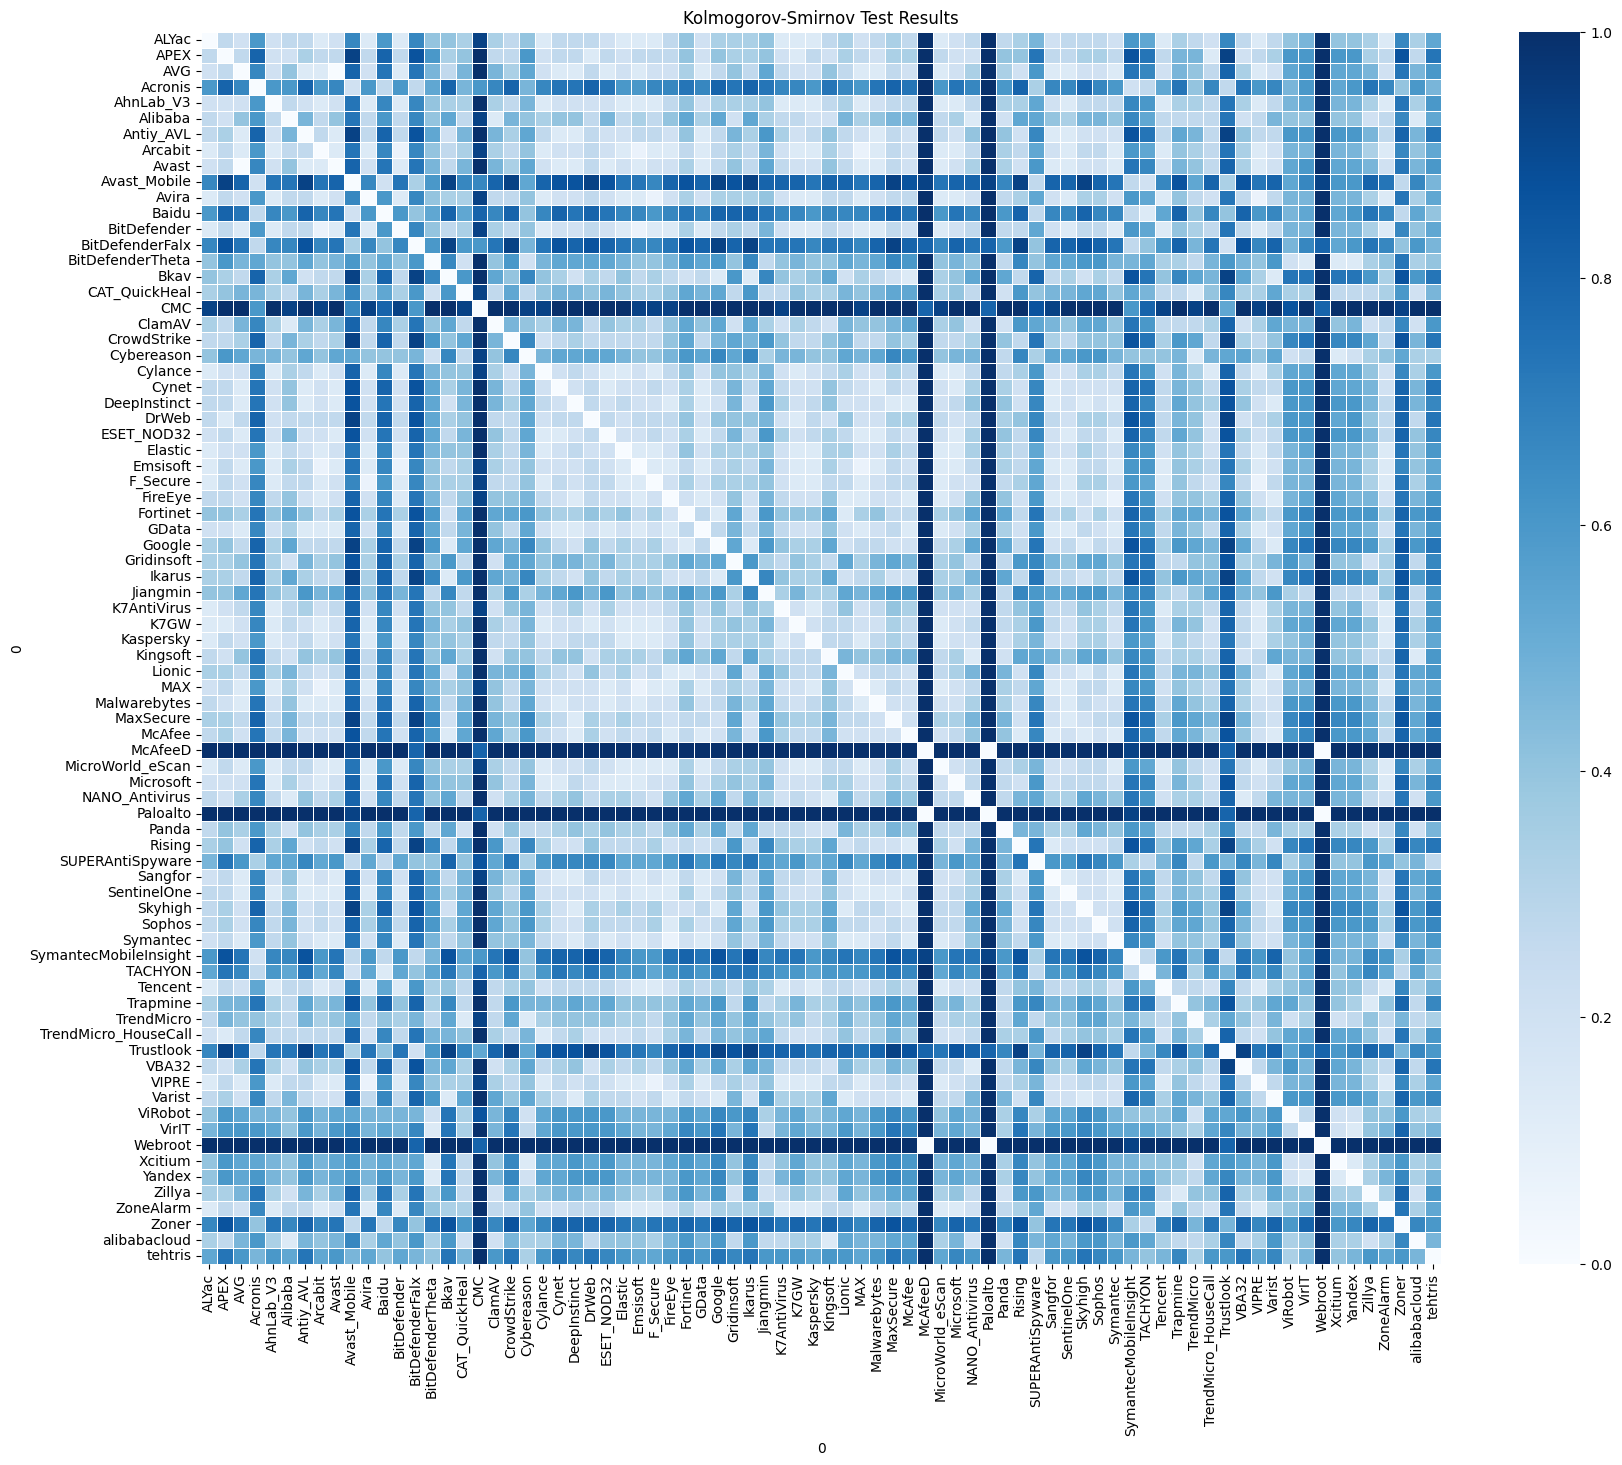

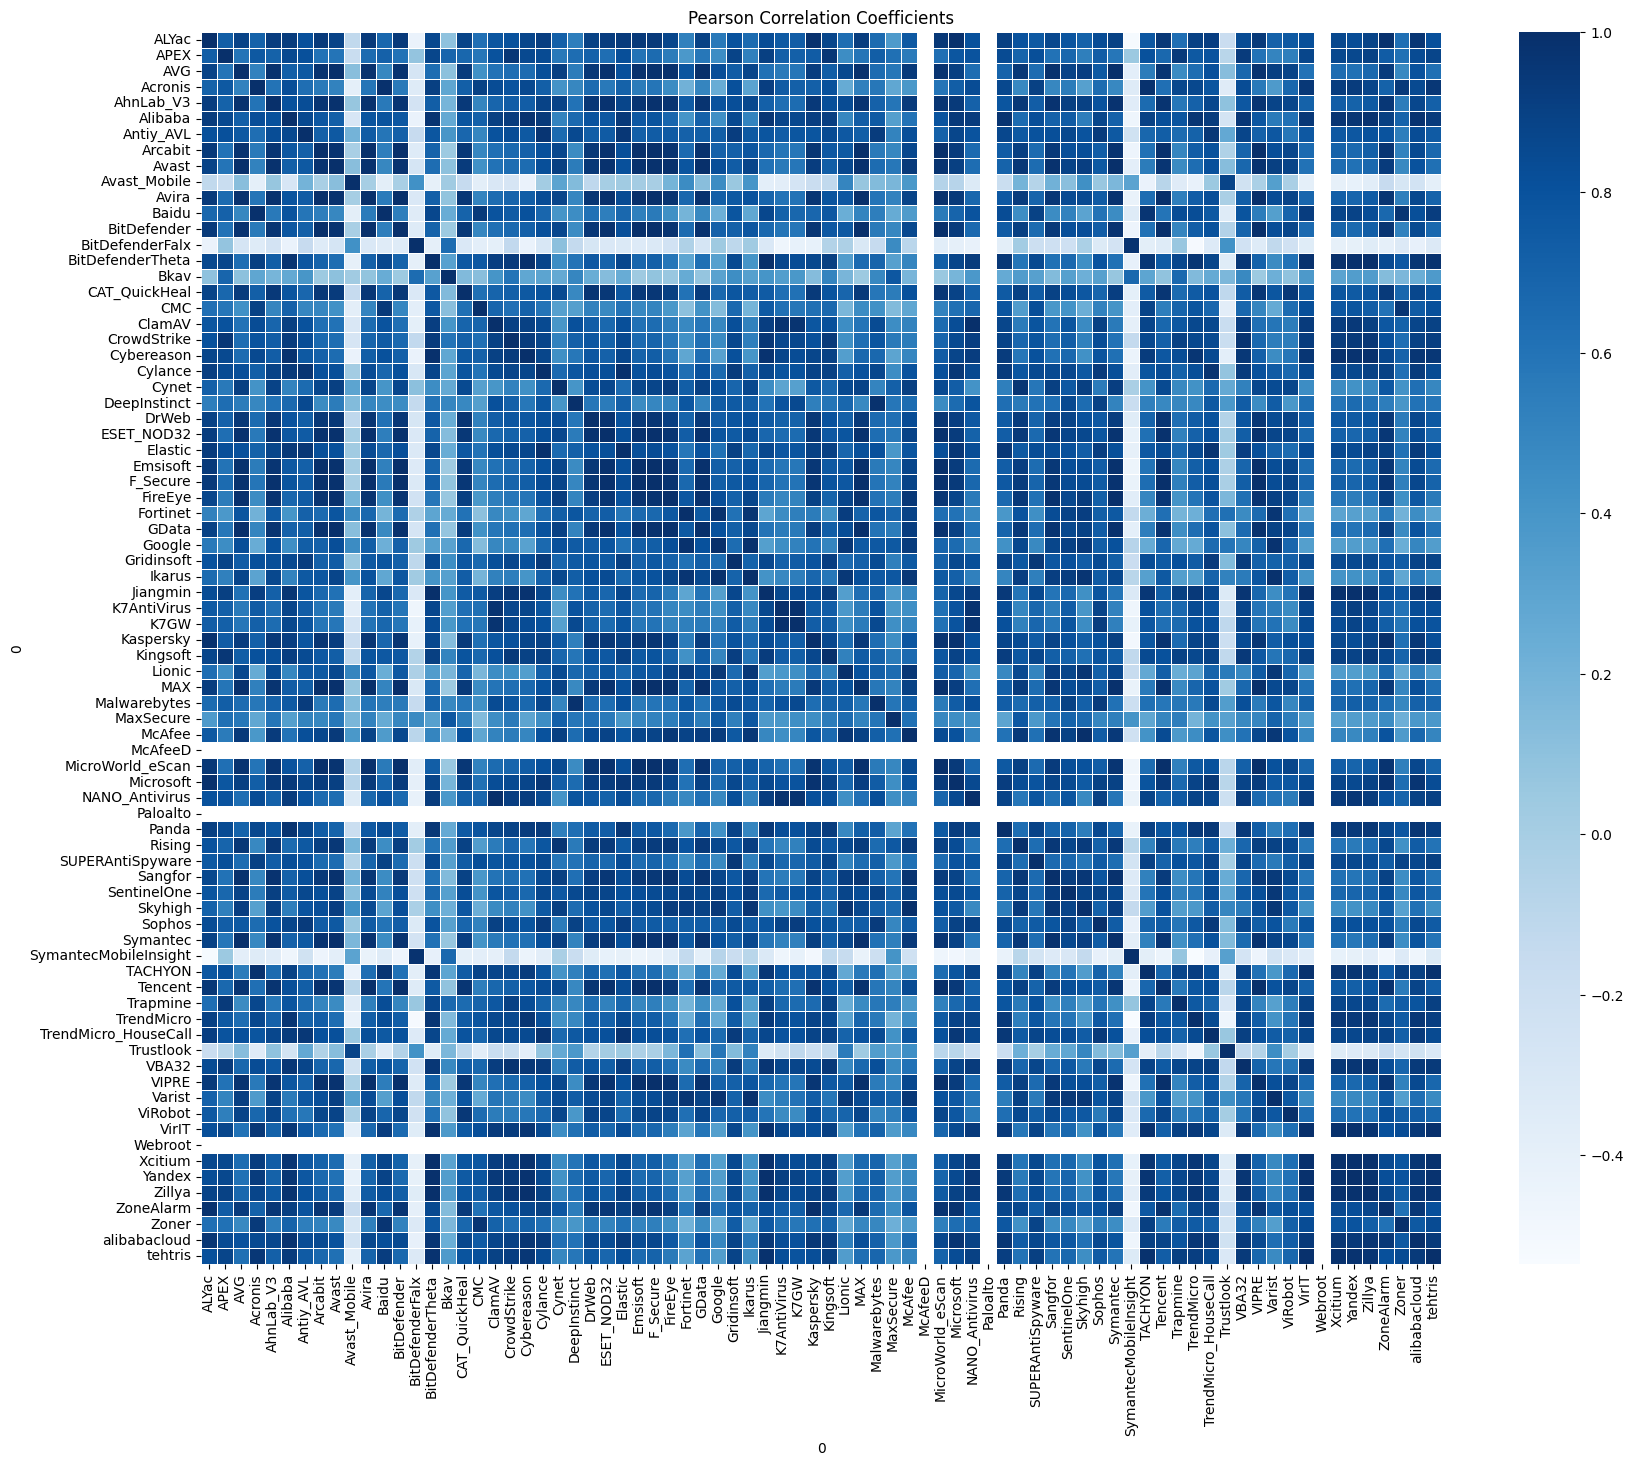

In [53]:
# Function to plot heatmap
def plot_heatmap(data, title, cmap="Blues", annot=False):
    plt.figure(figsize=(20, 16))
    sns.heatmap(data.astype(float), annot=annot, fmt=".2f", cmap=cmap, cbar=True, linewidths=0.5)
    plt.title(title)
    plt.show()

# Plot the Kolmogorov-Smirnov Test Results heatmap without annotations
plot_heatmap(ks_results, "Kolmogorov-Smirnov Test Results", annot=False)

# Plot the Pearson Correlation Coefficients heatmap without annotations
plot_heatmap(corr_results, "Pearson Correlation Coefficients", annot=False)


In [54]:
# Filter the columns to include only the specified titles
titles_to_keep = ["Avira", "BitDefender", "ESET_NOD32", "Kaspersky", "Microsoft", "TrendMicro"]

ks_results_filtered = ks_results[titles_to_keep]
corr_results_filtered = corr_results[titles_to_keep]

# Display the filtered results
print("Filtered Kolmogorov-Smirnov Test Results:")
print(ks_results_filtered)
print("\nFiltered Pearson Correlation Coefficients:")
print(corr_results_filtered)

Filtered Kolmogorov-Smirnov Test Results:
0                Avira BitDefender ESET_NOD32 Kaspersky Microsoft TrendMicro
0                                                                           
ALYac         0.133333    0.133333        0.2  0.133333       0.2   0.266667
APEX          0.266667    0.266667   0.266667  0.266667       0.2   0.466667
AVG                0.2    0.133333   0.133333       0.2       0.2        0.4
Acronis            0.6         0.6   0.733333       0.6  0.733333        0.4
AhnLab_V3     0.133333    0.133333        0.2  0.133333  0.133333   0.333333
...                ...         ...        ...       ...       ...        ...
Zillya        0.333333    0.333333   0.466667  0.333333       0.4        0.4
ZoneAlarm     0.133333    0.133333   0.266667  0.133333  0.133333   0.266667
Zoner         0.733333    0.666667        0.8  0.733333       0.8   0.466667
alibabacloud  0.333333         0.4        0.4  0.333333  0.466667   0.266667
tehtris       0.533333    0.533333

In [64]:
# Save the classification report to an Excel file
corr_results_filtered.to_excel("correlation.xlsx", index=True)

print("Classification report saved to correlation.xlsx")

Classification report saved to correlation.xlsx


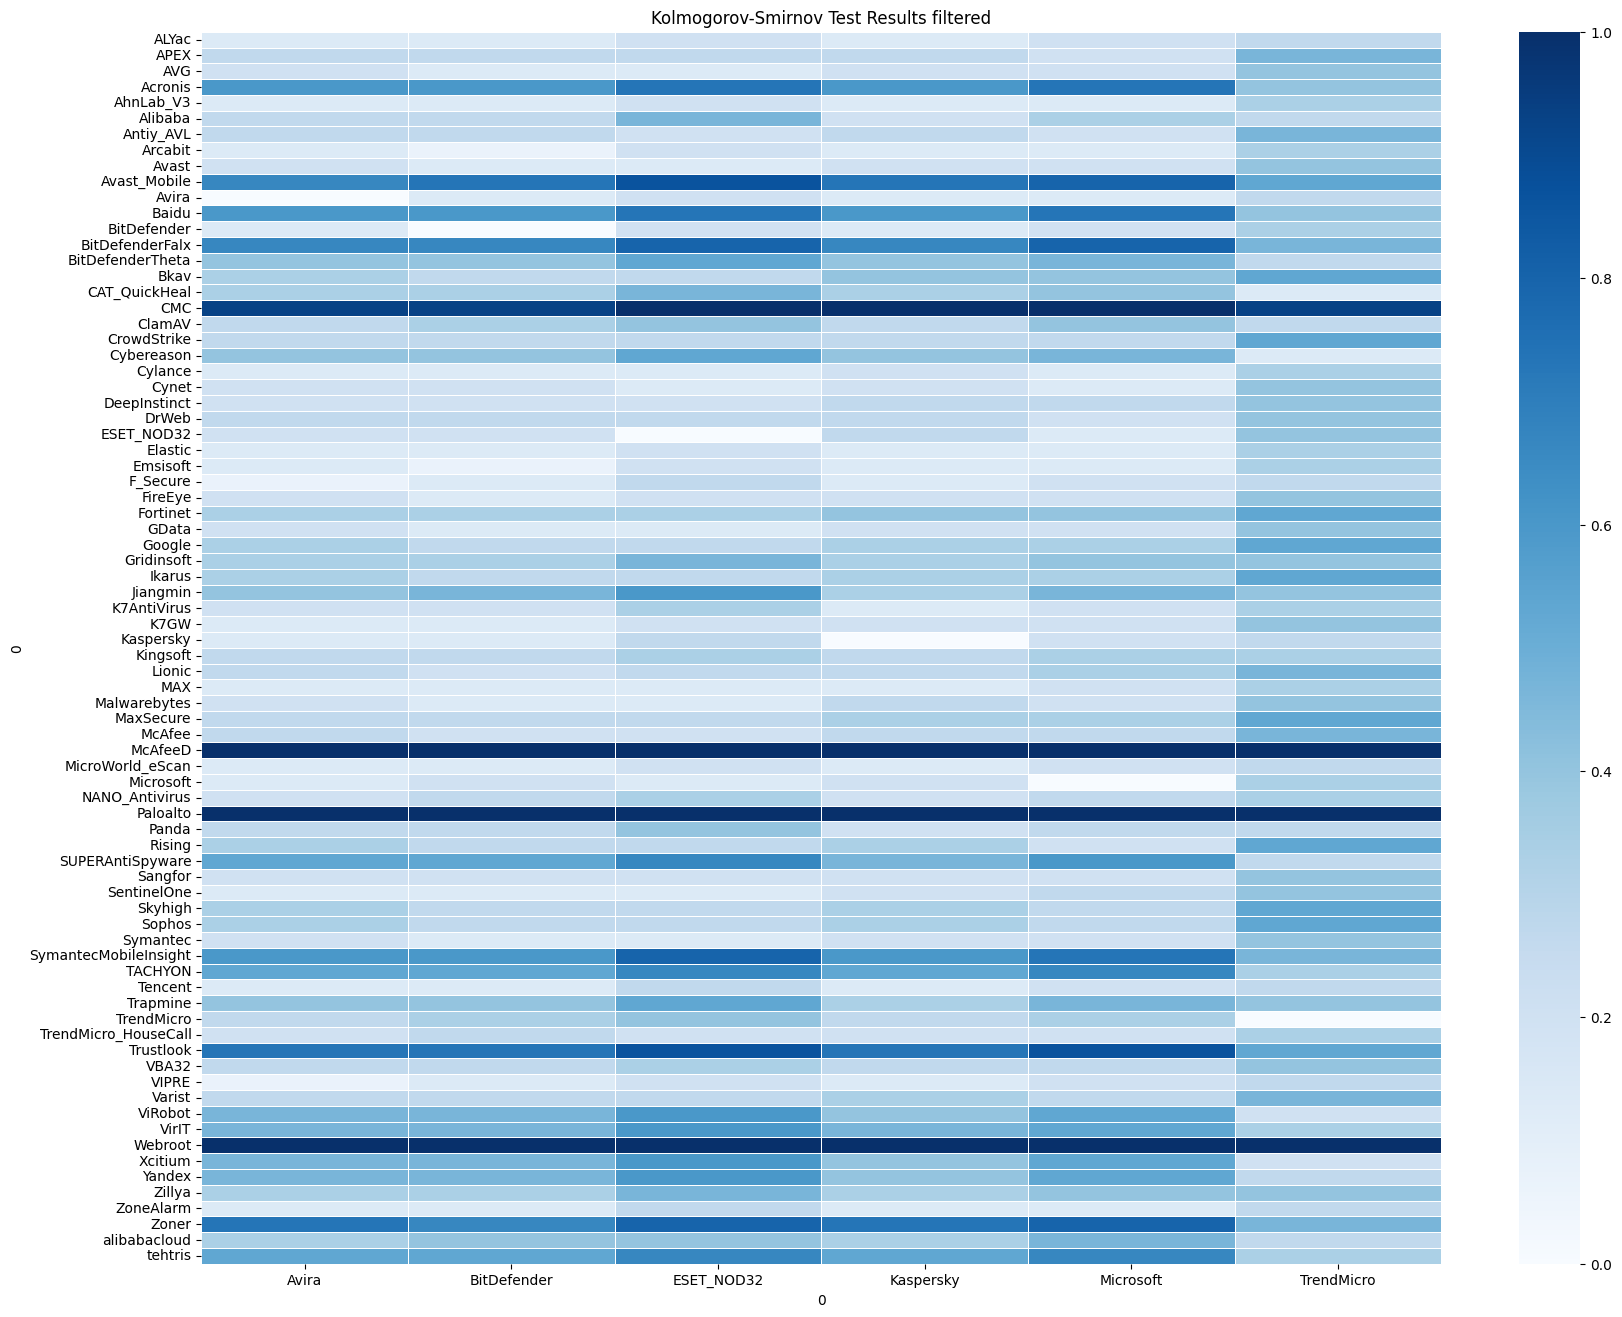

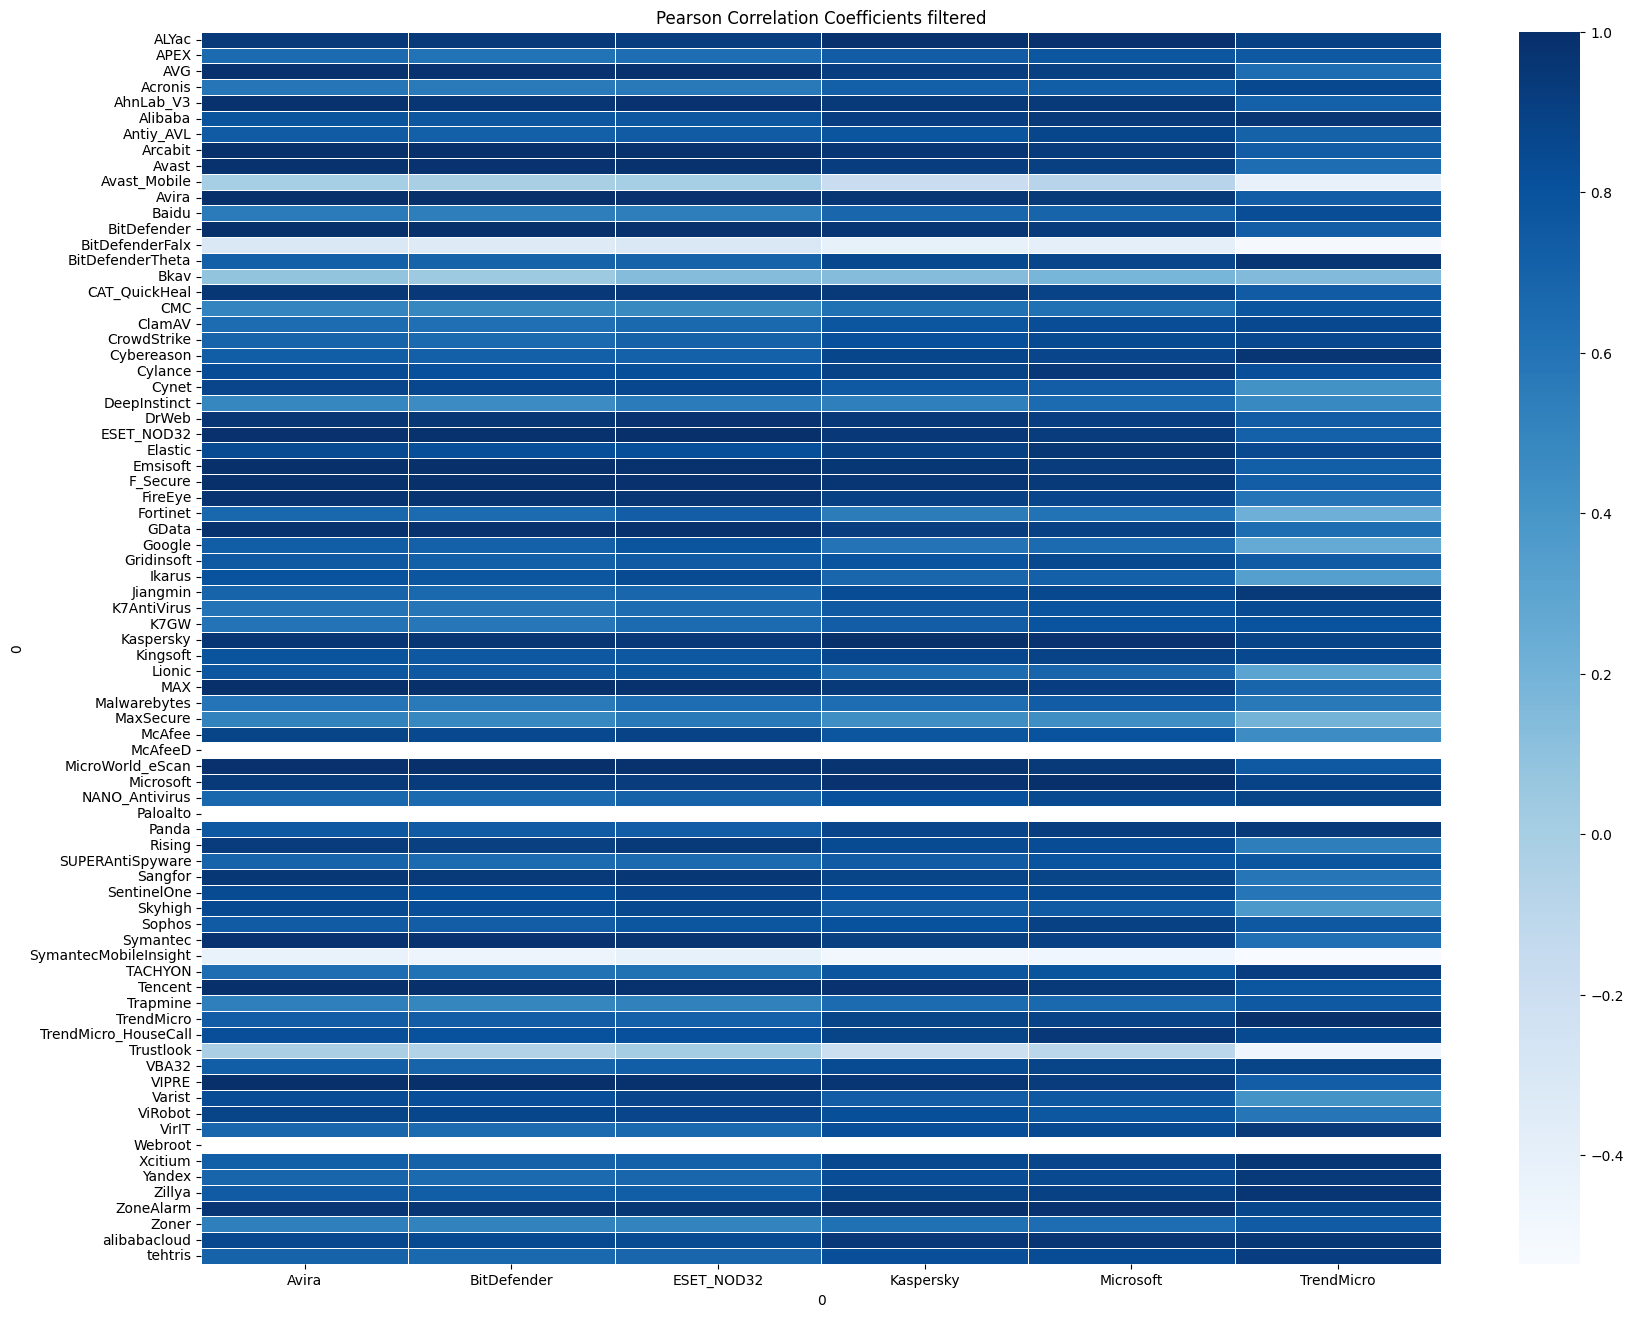

In [55]:
# Plot the Kolmogorov-Smirnov Test Results heatmap without annotations
plot_heatmap(ks_results_filtered, "Kolmogorov-Smirnov Test Results filtered", annot=False)

# Plot the Pearson Correlation Coefficients heatmap without annotations
plot_heatmap(corr_results_filtered, "Pearson Correlation Coefficients filtered", annot=False)

In [67]:
import pandas as pd

# Load data from the image into a DataFrame
file_path = 'correlation.xlsx'
df = pd.read_excel(file_path, usecols="B:G", skiprows=1, nrows=75)

# Calculate the average values for each column
avg_values = df.mean(df)

# Central reference average value (ESET_NOD32)
central_reference_avg = avg_values['ESET_NOD32']

# Calculate weights based on the central reference
weights = avg_values / central_reference_avg

# Apply the weights to each row and calculate the weighted sum
weighted_scores = df.multiply(weights).sum(axis=1)

# Normalize the scores to sum to 100
normalized_scores = (weighted_scores / weighted_scores.sum()) * 100

# Output the results
results = pd.DataFrame({
    'Antivirus': df.index,
    'Weighted Score': normalized_scores
}).reset_index(drop=True)

display(results)

TypeError: unhashable type: 'DataFrame'

In [ ]:
import pandas as pd

# Load the data from the image
file_path = "/mnt/data/image.png"
df = pd.read_csv(file_path)

# Central reference is ESET_NOD32
reference_column = 'ESET_NOD32'

# Calculate weights for each of the six items in the column title
column_titles = ['Avira', 'BitDefender', 'ESET_NOD32', 'Kaspersky', 'Microsoft', 'TrendMicro']
weights = {}

for column in column_titles:
    if column != reference_column:
        # Weight is the inverse of the average distance to the reference column
        weights[column] = 1 / abs(df[column] - df[reference_column]).mean()
    else:
        weights[column] = 1

# Normalize weights so they sum to 1
total_weight = sum(weights.values())
weights = {key: value / total_weight for key, value in weights.items()}

# Calculate the score for each row
df['Score'] = 0
for column in column_titles:
    df['Score'] += df[column] * weights[column]

# Normalize the scores so the total score is 100
df['Score'] = df['Score'] / df['Score'].sum() * 100

display(df)